In [1]:
! pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [2]:
# required packages

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import datetime

In [3]:
"""reading the image, rotating the image and storing the original 
and the rotated image in images list"""

img = cv2.imread("/content/3657993.jpg")
src = img
images = [src]
for i in range(3):
  temp = cv2.rotate(src, cv2.cv2.ROTATE_90_CLOCKWISE)
  images.append(temp)
  src = temp

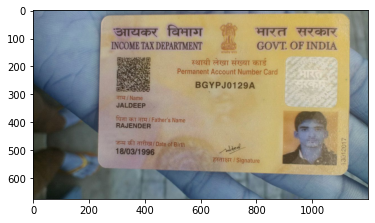

In [4]:
"""finding the most appropriate position for the image to be read 
to get correct output and displaying the image"""

for img in images:
  text = pytesseract.image_to_string(img, lang='ind')
  words = text.split()
  if 'DEPARTMENT' in words:
    image = img 
    break
plt.imshow(image)

In [5]:
"""preprocessing the image for optimal output 
and extracting the text from the image using tesseract OCR"""

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, final_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
text = pytesseract.image_to_string(final_image, lang='ind')
print(text)

-

sae fararar APA Te

INCOME TAX DEPARTMENT GOVT. OF INDIA

   

rom AN MS FT
Permanent Account Numbe
BGYPJO129A
JALDEEP
FRAT 21 A14 / Father's Name 3
RAJENDER —
FA 1 aing) Dateof Bian hded
18/03/1996 Ae PN i
FEAT / Sign Ban

  



In [6]:
"""splitting the text and storing the words read in the words list"""

words = text.split()
print(words)

['-', 'sae', 'fararar', 'APA', 'Te', 'INCOME', 'TAX', 'DEPARTMENT', 'GOVT.', 'OF', 'INDIA', 'rom', 'AN', 'MS', 'FT', 'Permanent', 'Account', 'Numbe', 'BGYPJO129A', 'JALDEEP', 'FRAT', '21', 'A14', '/', "Father's", 'Name', '3', 'RAJENDER', '—', 'FA', '1', 'aing)', 'Dateof', 'Bian', 'hded', '18/03/1996', 'Ae', 'PN', 'i', 'FEAT', '/', 'Sign', 'Ban']


In [7]:
"""condition to extract the important or relevant words from the words list 
from which we will get the required words output"""

req = []
for i in words:
   if len(i) == 10:
     req.append(i)

print(req)

['DEPARTMENT', 'BGYPJO129A', '18/03/1996']


In [8]:
"""applying conditions to extract the date of birth and PAN card number 
from the list of important or relevant words"""

date_format = '%d/%m/%Y'
for idx, i in enumerate(req):
  if any(letter.isalpha() for letter in i) & any(letter.isnumeric() for letter in i):
    pan_idx = idx
  try:
    date_obj = datetime.datetime.strptime(i, date_format)
    date_idx = idx
  except ValueError:
    continue
  

print('PAN Card Number: ', req[pan_idx])
print('Date Of Birth: ', req[date_idx])

PAN Card Number:  BGYPJO129A
Date Of Birth:  18/03/1996


In [9]:
"""creating a function combining all the steps discussed above into one function
which takes input as the image path and outputs the required fields
and the orientation of the image used for extracting the text"""

def img_details(image_path):

    path = image_path
    img = cv2.imread(path)
    src = img
    images = [src]
    for i in range(3):
      temp = cv2.rotate(src, cv2.cv2.ROTATE_90_CLOCKWISE)
      images.append(temp)
      src = temp
    
    for img in images:
      text = pytesseract.image_to_string(img, lang='ind')
      words = text.split()
      if 'DEPARTMENT' in words:
        image = img 
        break
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, final_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
    text = pytesseract.image_to_string(final_image, lang='ind')
    # print(text)

    words = text.split()
    # print(words)

    req = []
    for i in words:
      if len(i) == 10:
        req.append(i)
    # print(req)

    date_format = '%d/%m/%Y'
    for idx, i in enumerate(req):
      if any(letter.isalpha() for letter in i) & any(letter.isnumeric() for letter in i):
        pan_idx = idx
      try:
        date_obj = datetime.datetime.strptime(i, date_format)
        date_idx = idx
      except ValueError:
        continue
  
    print('PAN Card Number: ', req[pan_idx])
    print('Date Of Birth: ', req[date_idx])

PAN Card Number:  ELWPM8089J
Date Of Birth:  30/01/1997


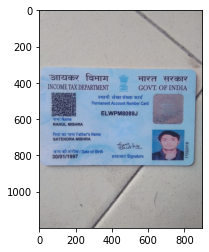

In [10]:
img_details('/content/3642684.jpg')

PAN Card Number:  BXAPC1000L
Date Of Birth:  13/09/1996


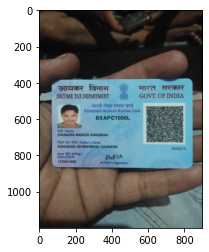

In [11]:
img_details('/content/3648476-1.jpg')

PAN Card Number:  BGYPJO129A
Date Of Birth:  18/03/1996


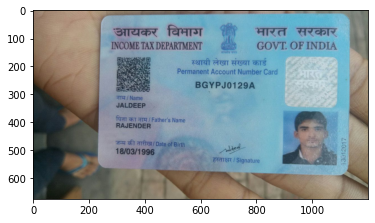

In [12]:
img_details('/content/3657993.jpg')